In [130]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize']= (10,5)
plt.rcParams['figure.dpi'] = 250
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as pe
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [131]:
df = pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [132]:
#The first column(country column) will not help for clusterning because we are droping the column

df = df.drop(columns=df.iloc[:,:1])

{'whiskers': [<matplotlib.lines.Line2D at 0x1db80c3acd0>,
 'caps': [<matplotlib.lines.Line2D at 0x1db80c32dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1db81593dc0>,
 'medians': [<matplotlib.lines.Line2D at 0x1db80c32fa0>,
 'fliers': [<matplotlib.lines.Line2D at 0x1db80c32040>,
 'means': []}

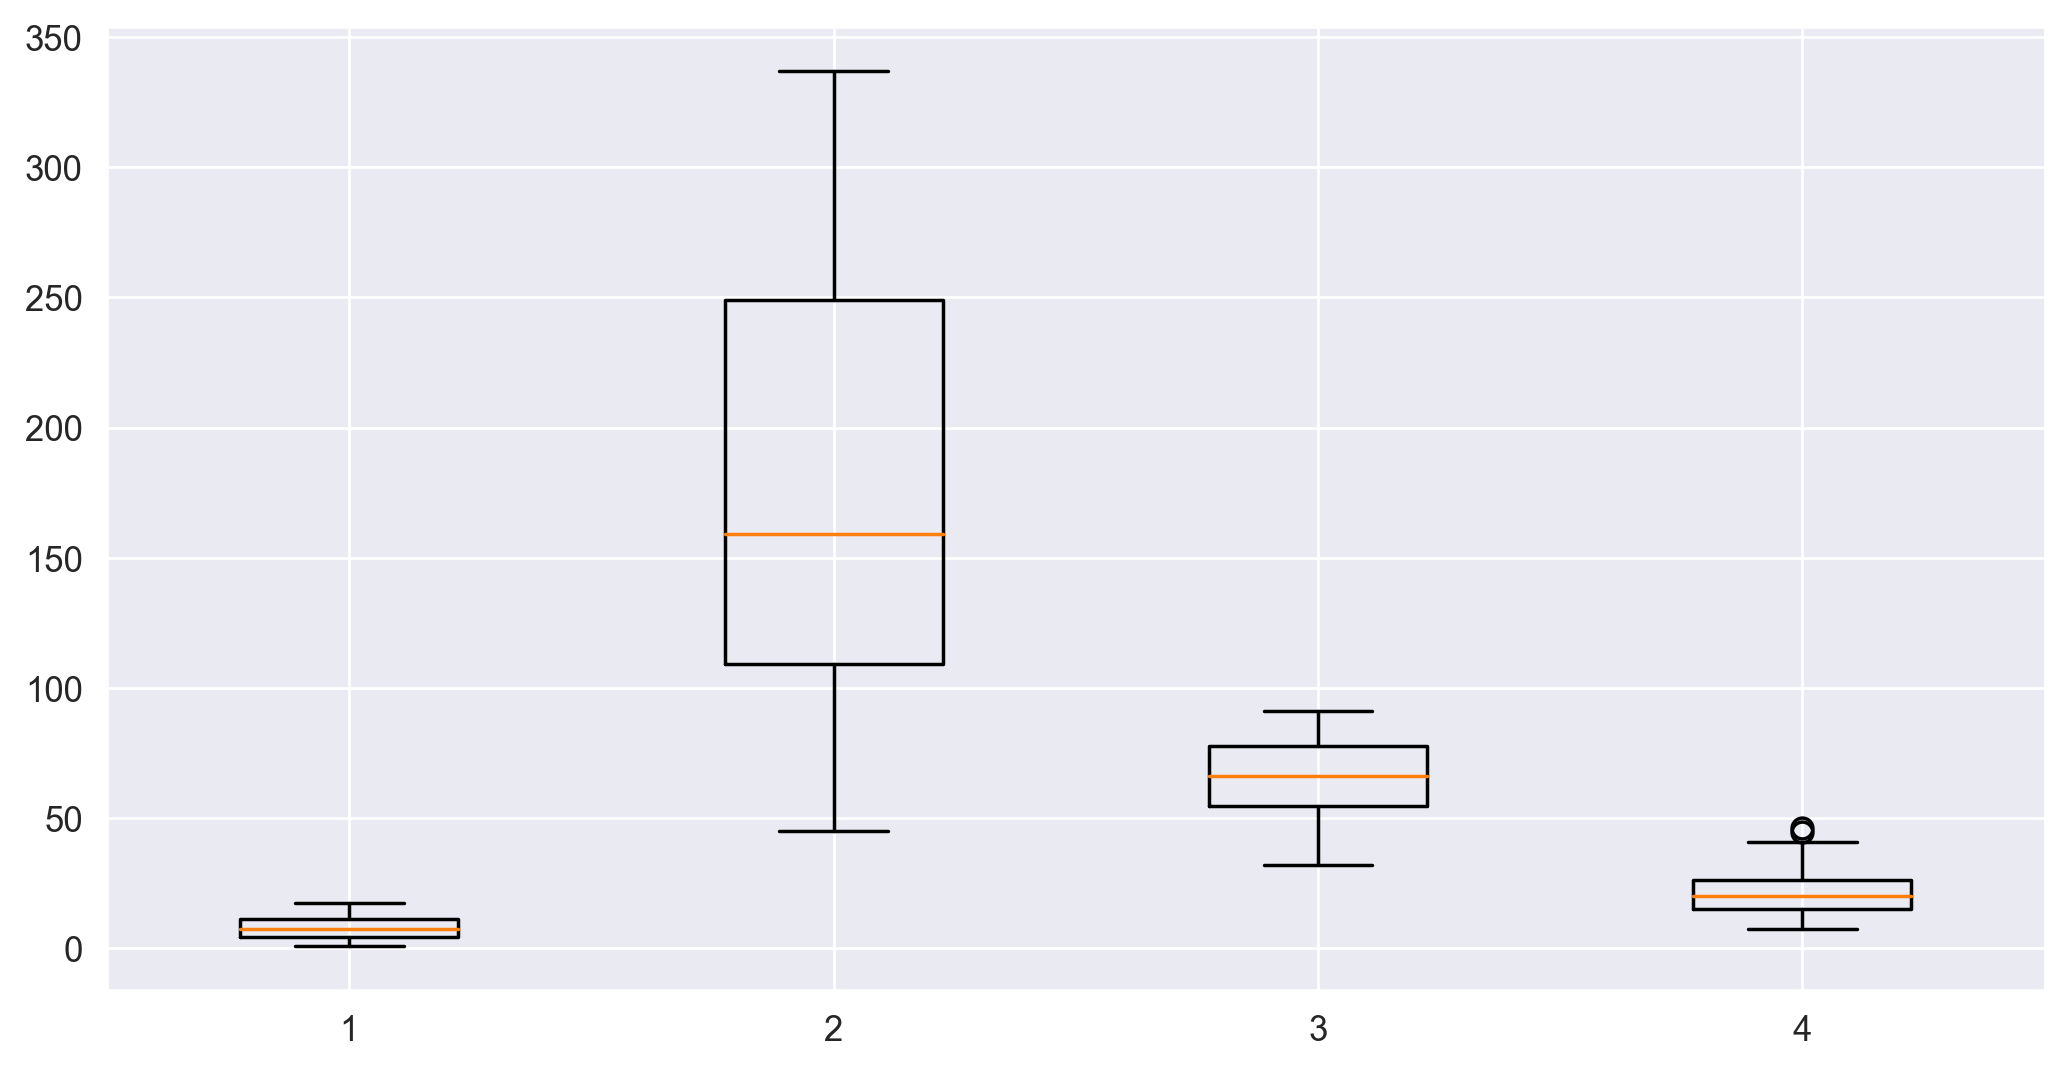

In [133]:
#Clustering algorithms are highly affected by outliers, Plotting boxplot

plt.boxplot(df)

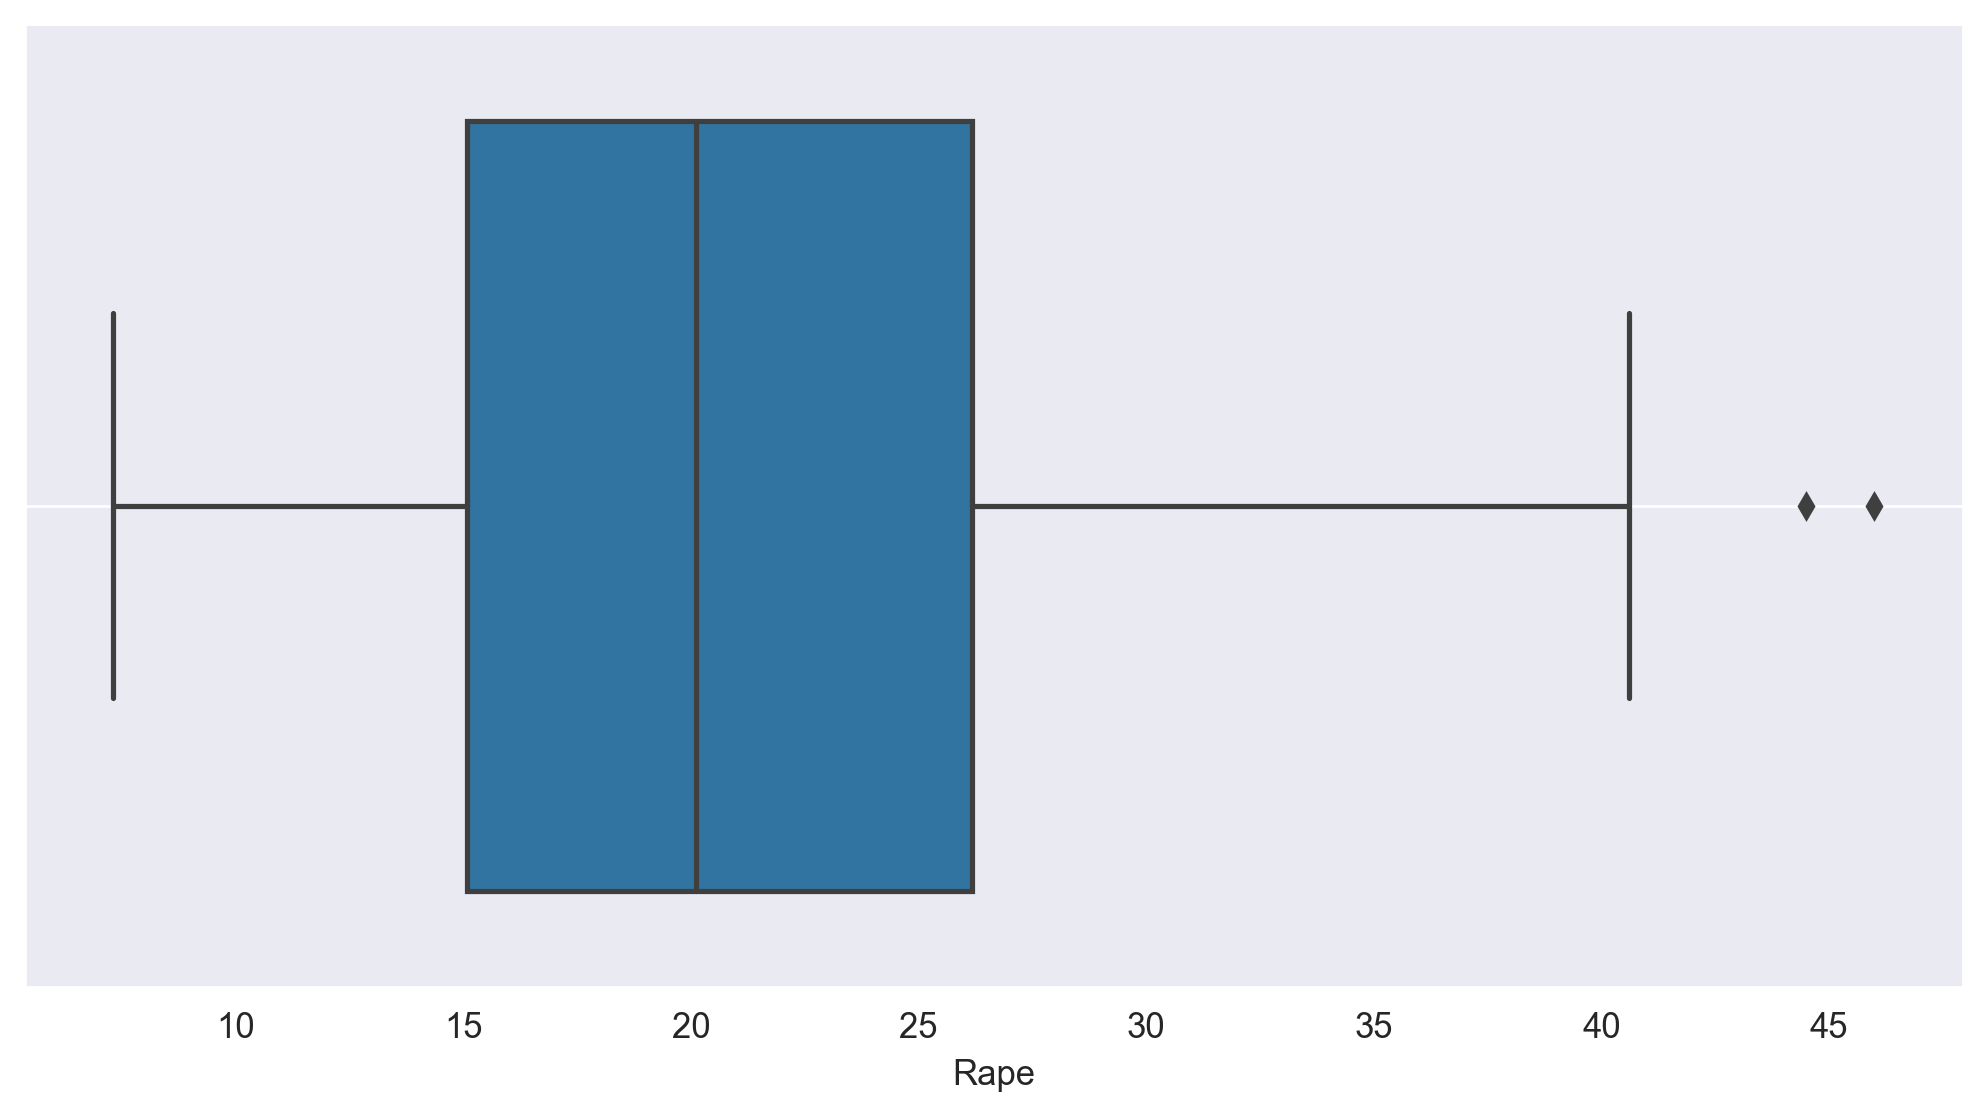

In [134]:
#The Rape column has outlier
sns.boxplot(df['Rape'])
plt.grid()

In [135]:
#Outplier detection function

def outlier_function(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper

In [136]:
outlier_function(df,'Rape')

(-1.5750000000000028, 42.825)

In [137]:
#The values inside Rape greater than 42.825(upper extreme) will be the outplier
df[df['Rape']>42.825]

,Murder,Assault,UrbanPop,Rape
1,10.0,263,48,44.5
27,12.2,252,81,46.0


In [138]:
#Capping outlier

df.loc[df['Rape']>42.825,'Rape'] = 42.825

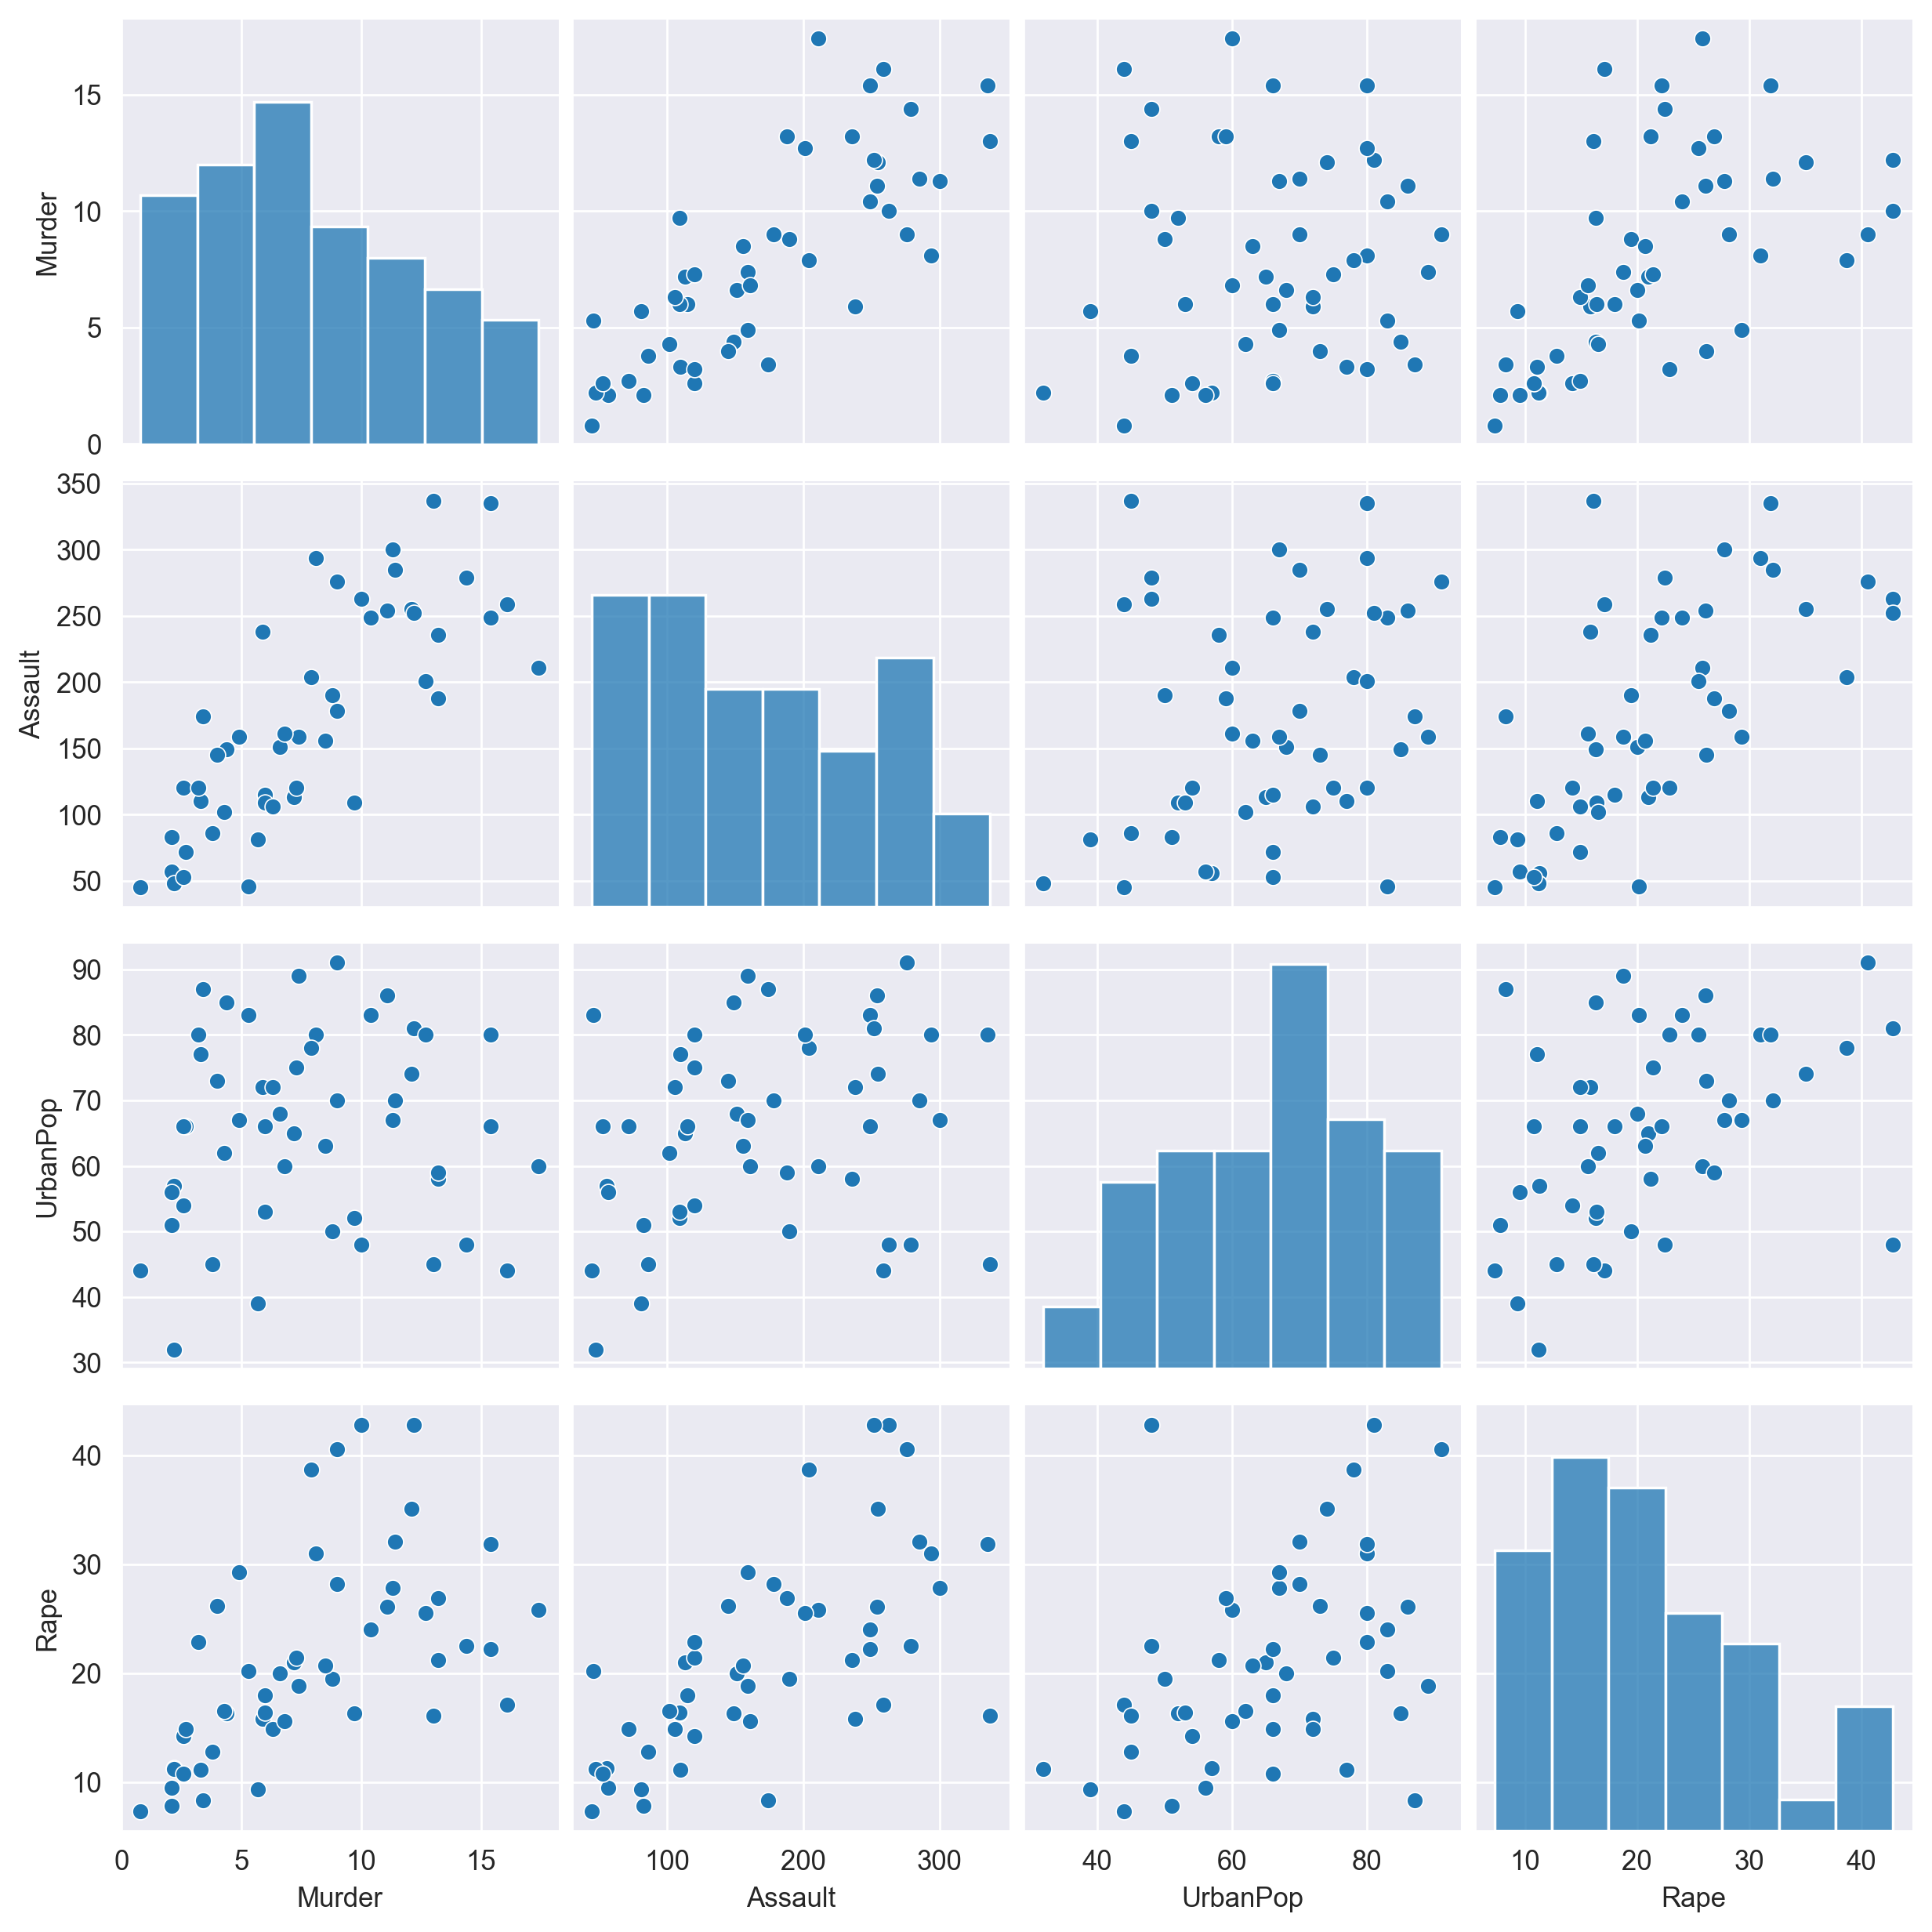

In [139]:
sns.pairplot(df)

In [140]:
df.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.135000
std,4.35551,83.337661,14.474763,9.120419
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,42.825000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 1.7 KB


In [142]:
#check the null values present or not

df.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

# Hierarchical clustering

Feature scaling

In [143]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514,  0.00719922],
       [ 0.51301858,  1.11805959, -1.22406668,  2.40232482],
       [ 0.07236067,  1.49381682,  1.00912225,  1.0926203 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18108811],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.15588993],
       [ 0.02597562,  0.40290872,  0.86954794,  1.94545115],
       [-1.04088037, -0.73648418,  0.79976079, -1.11144904],
       [-0.43787481,  0.81502956,  0.45082502, -0.59088995],
       [ 1.76541475,  1.99078607,  1.00912225,  1.19230183],
       [ 2.22926518,  0.48775713, -0.38662083,  0.51668259],
       [-0.57702994, -1.51224105,  1.21848371, -0.10355803],
       [-1.20322802, -0.61527217, -0.80534376, -0.76810155],
       [ 0.60578867,  0.94836277,  1.21848371,  0.31731953],
       [-0.13637203, -0.70012057, -0.03768506, -0.01495223],
       [-1.29599811, -1.39102904, -0.5959823 , -1.08929758],
       [-0.41468229, -0.67587817,  0.03210209, -0.34722399],
       [ 0.44344101, -0.

In [144]:
from scipy.cluster import hierarchy

In [145]:
#Select the type of linkages
lk = ['single', 'complete', 'centroid','average']

def linkages(lk):
    lk = hierarchy.linkage(x, method = lk)
    dendrogram = hierarchy.dendrogram(lk)

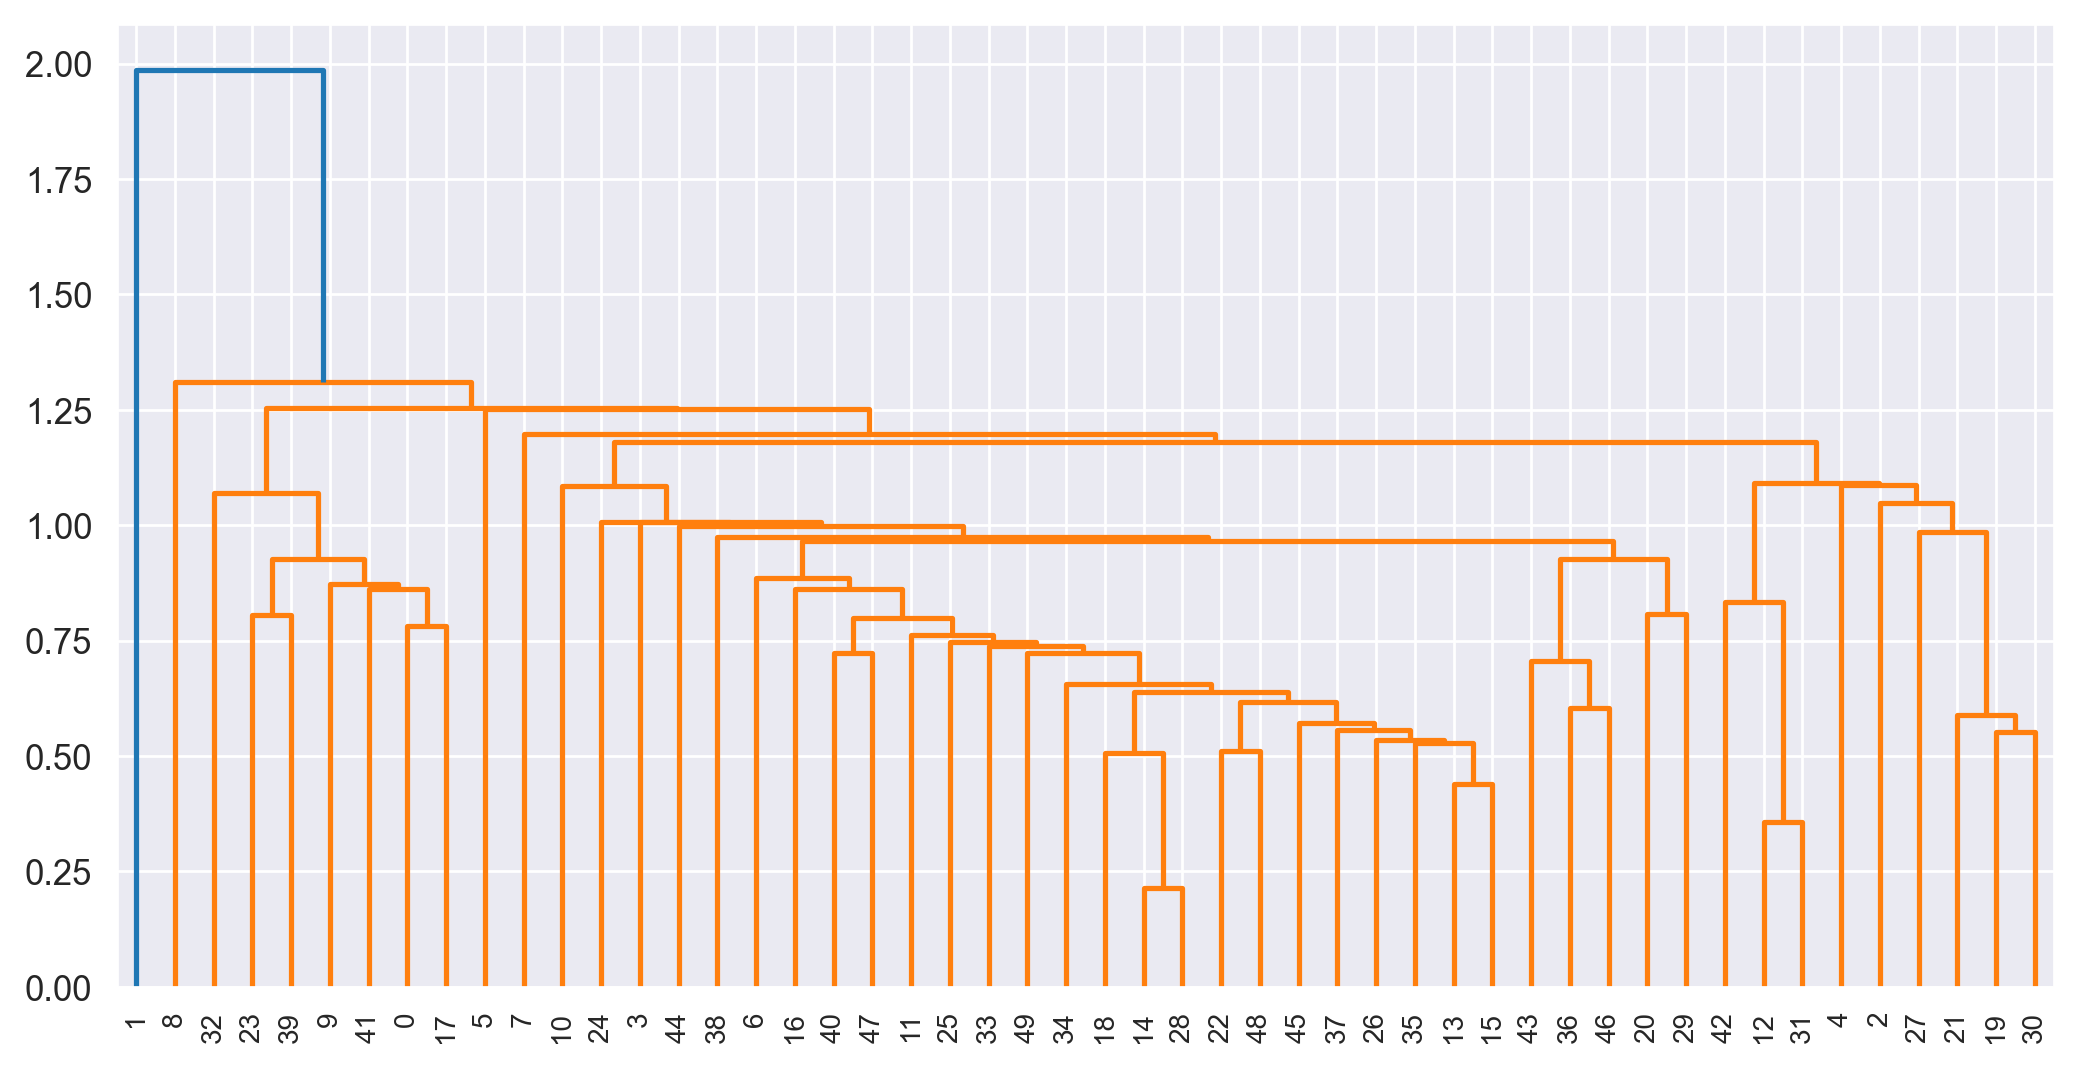

In [146]:
#Choosing number of cluster is not clear if we use 'single' linkage
linkages('single')  

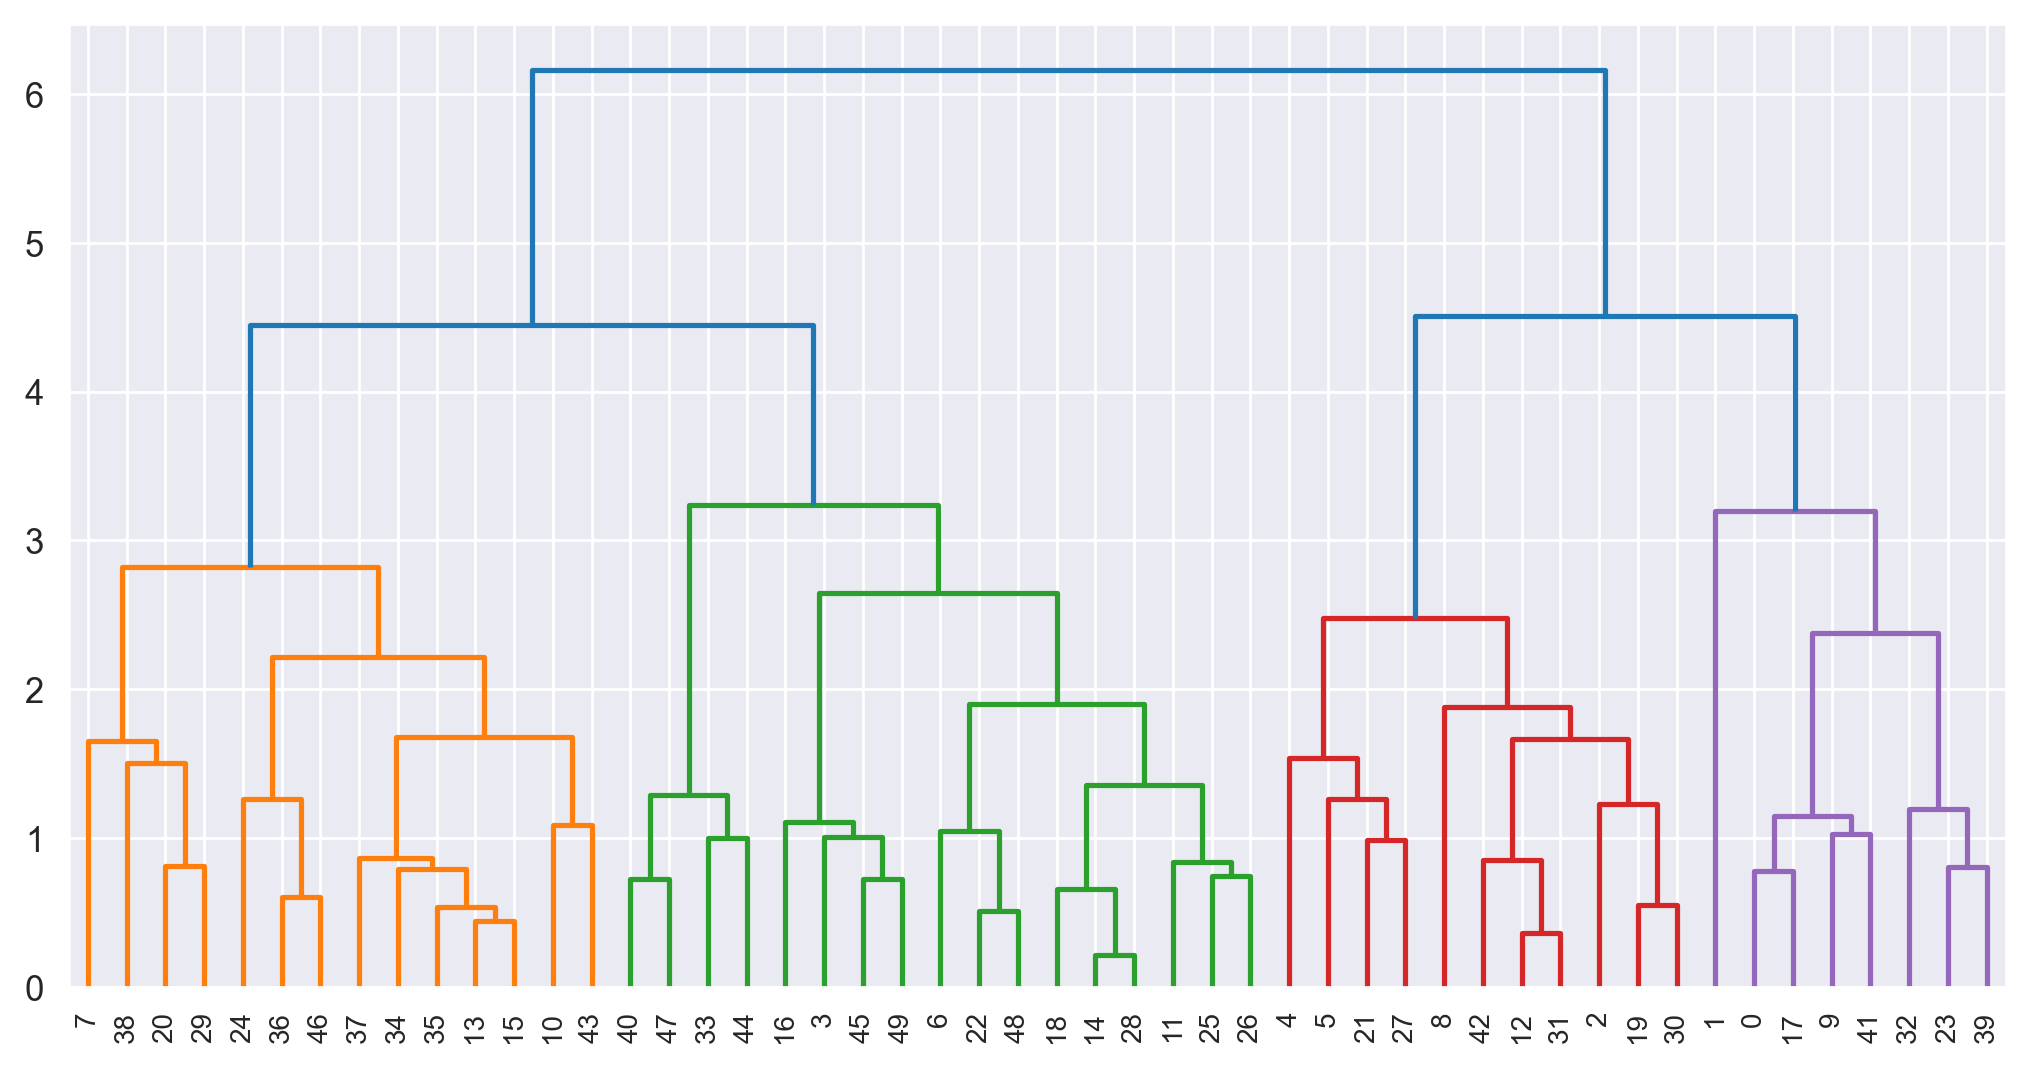

In [147]:
linkages('complete')

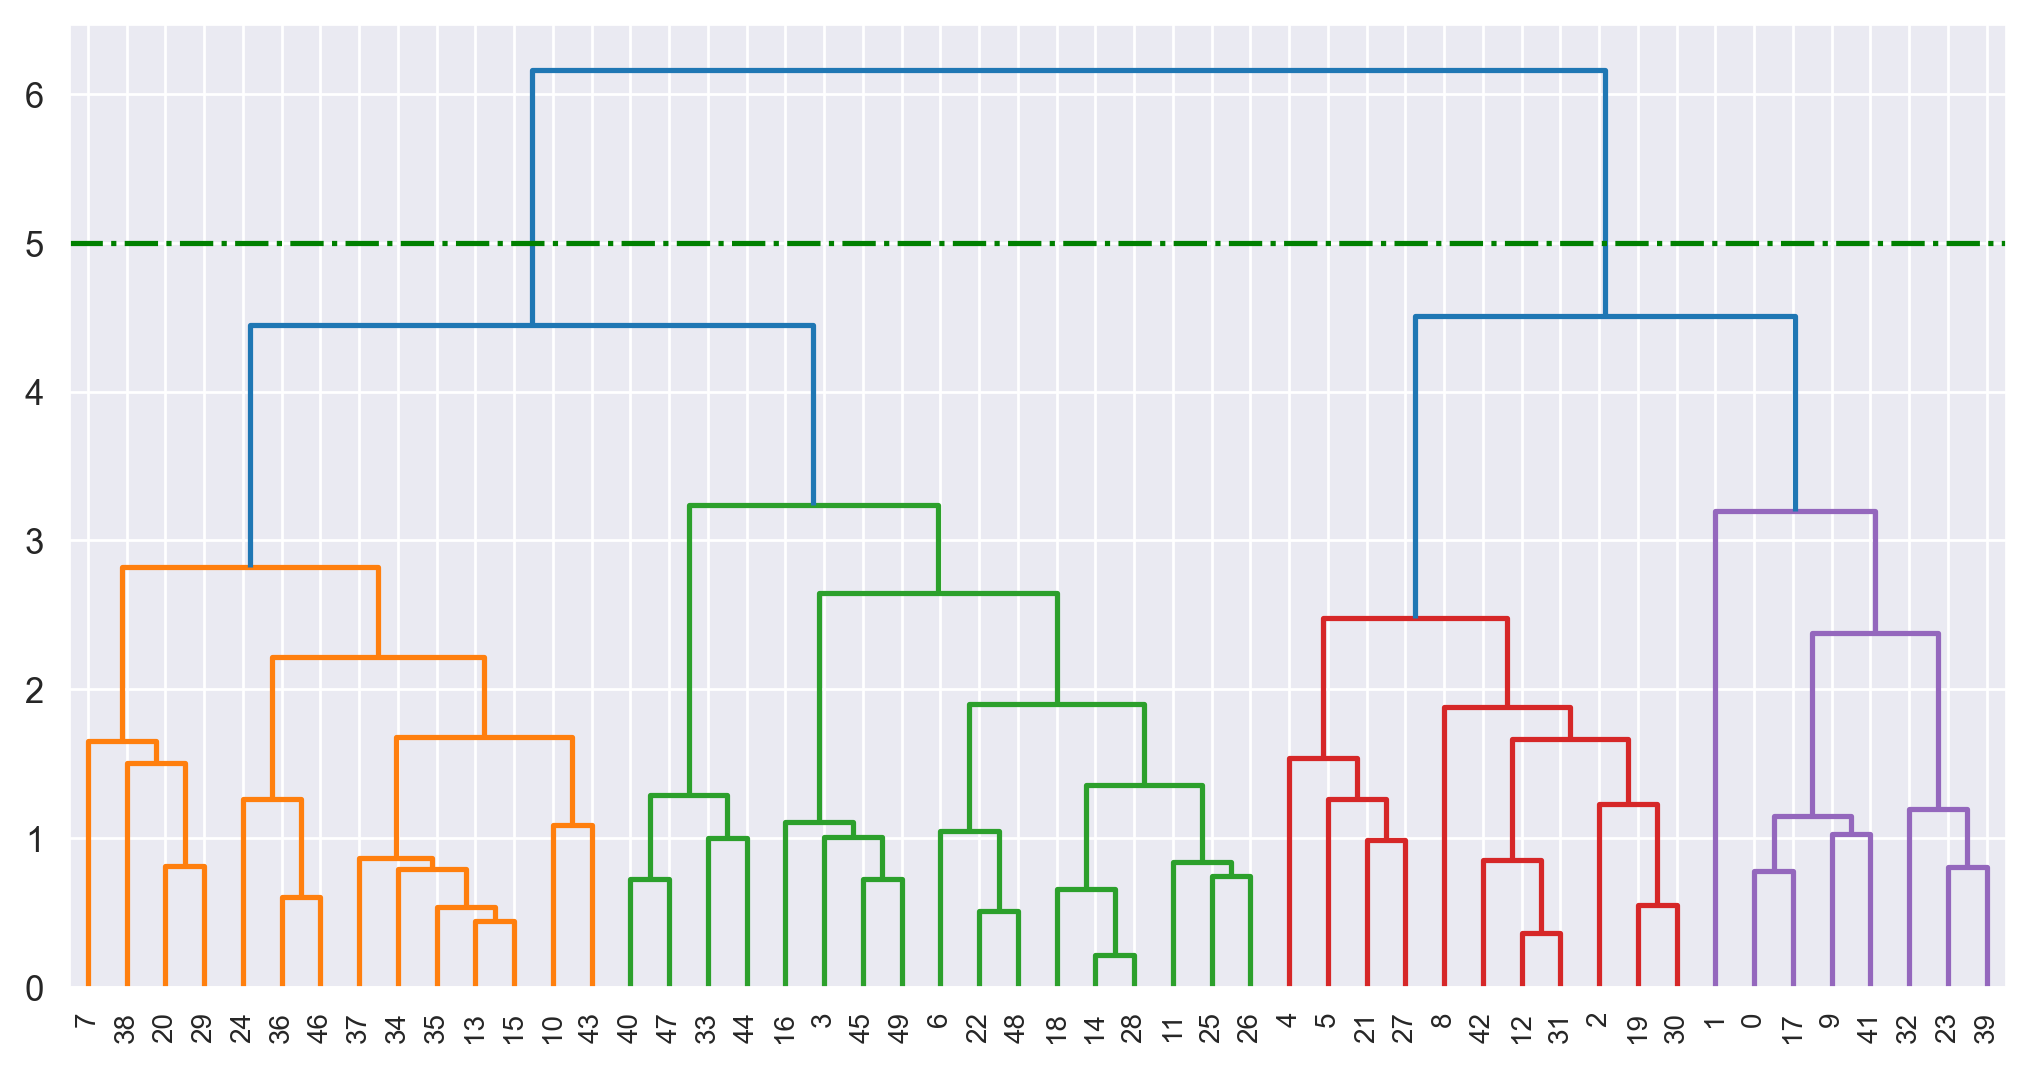

In [148]:
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y=5, c='green', linestyle='-.')

In [149]:
#To predict the number of cluster we can use another approch shown below
from sklearn.metrics import silhouette_score

sil_score=[]

for i in range(2,10):
    km = KMeans(n_clusters=i)
    y = km.fit_predict(x)
    sil_score.append(silhouette_score(x,y))

In [150]:
sil_score

[0.4094189143100629,
 0.3163103845861819,
 0.34136455290278506,
 0.2917691709631789,
 0.25205487804592797,
 0.250941298320197,
 0.23336040823458568,
 0.26915023860993126]

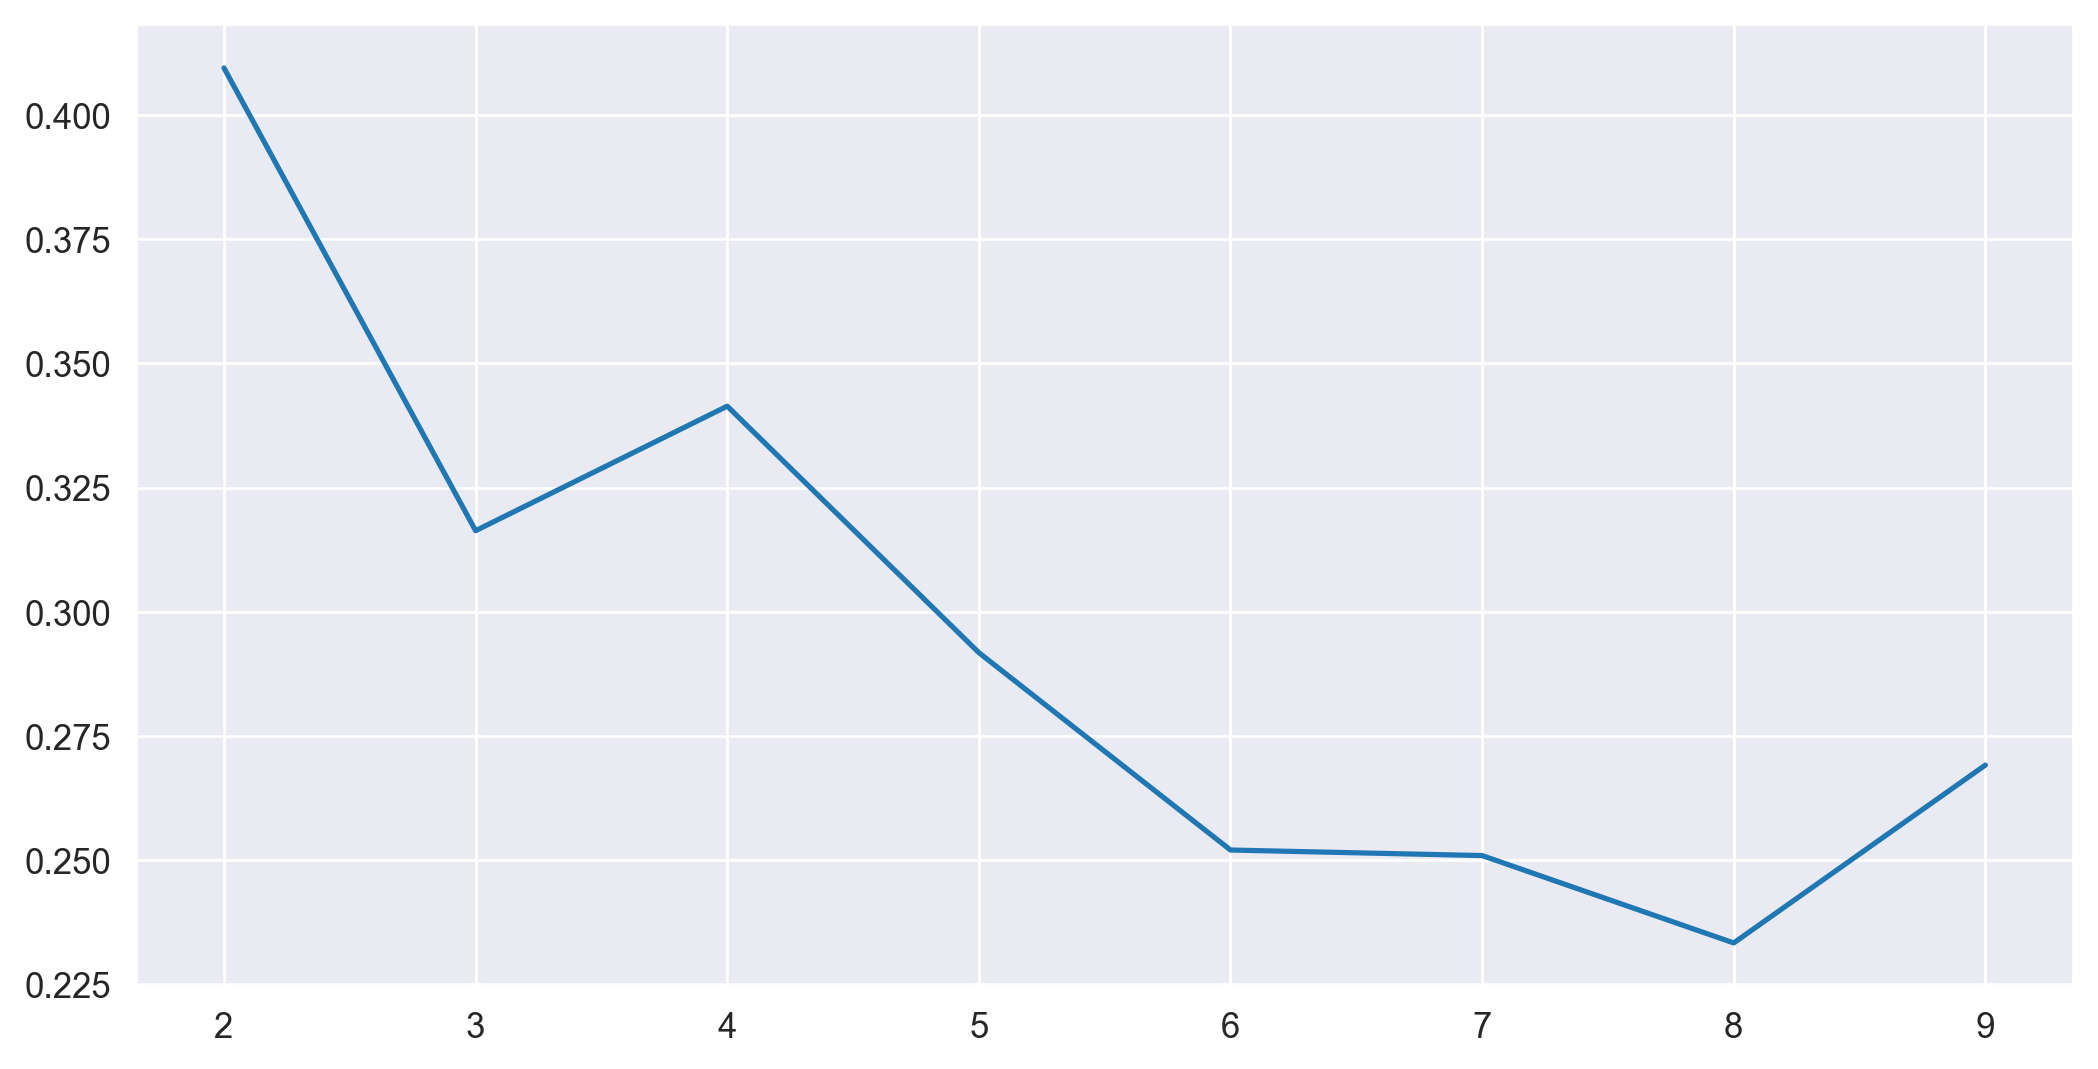

In [151]:
plt.plot(range(2,10), sil_score)

Using complete linkage - we can draw a vertical line by choosing cluster=2 or by counting the number of colors by choosing cluster=4.

# Model building

In [152]:
#2 cluster
from sklearn.cluster import AgglomerativeClustering

ag = AgglomerativeClustering(n_clusters=2)
y = ag.fit_predict(x)
y

array([1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0], dtype=int64)

In [153]:
df['cluster'] = y
df

,Murder,Assault,UrbanPop,Rape,cluster
0,13.2,236,58,21.200,1
1,10.0,263,48,42.825,1
2,8.1,294,80,31.000,1
3,8.8,190,50,19.500,0
4,9.0,276,91,40.600,1
5,7.9,204,78,38.700,1
6,3.3,110,77,11.100,0
7,5.9,238,72,15.800,0
8,15.4,335,80,31.900,1
9,17.4,211,60,25.800,1


In [154]:
df.groupby('cluster').agg('mean')

,Murder,Assault,UrbanPop,Rape
cluster,,,,
0,5.003226,116.483871,63.838710,16.338710
1,12.331579,259.315789,68.315789,28.960526


<AxesSubplot:xlabel='Rape', ylabel='Assault'>

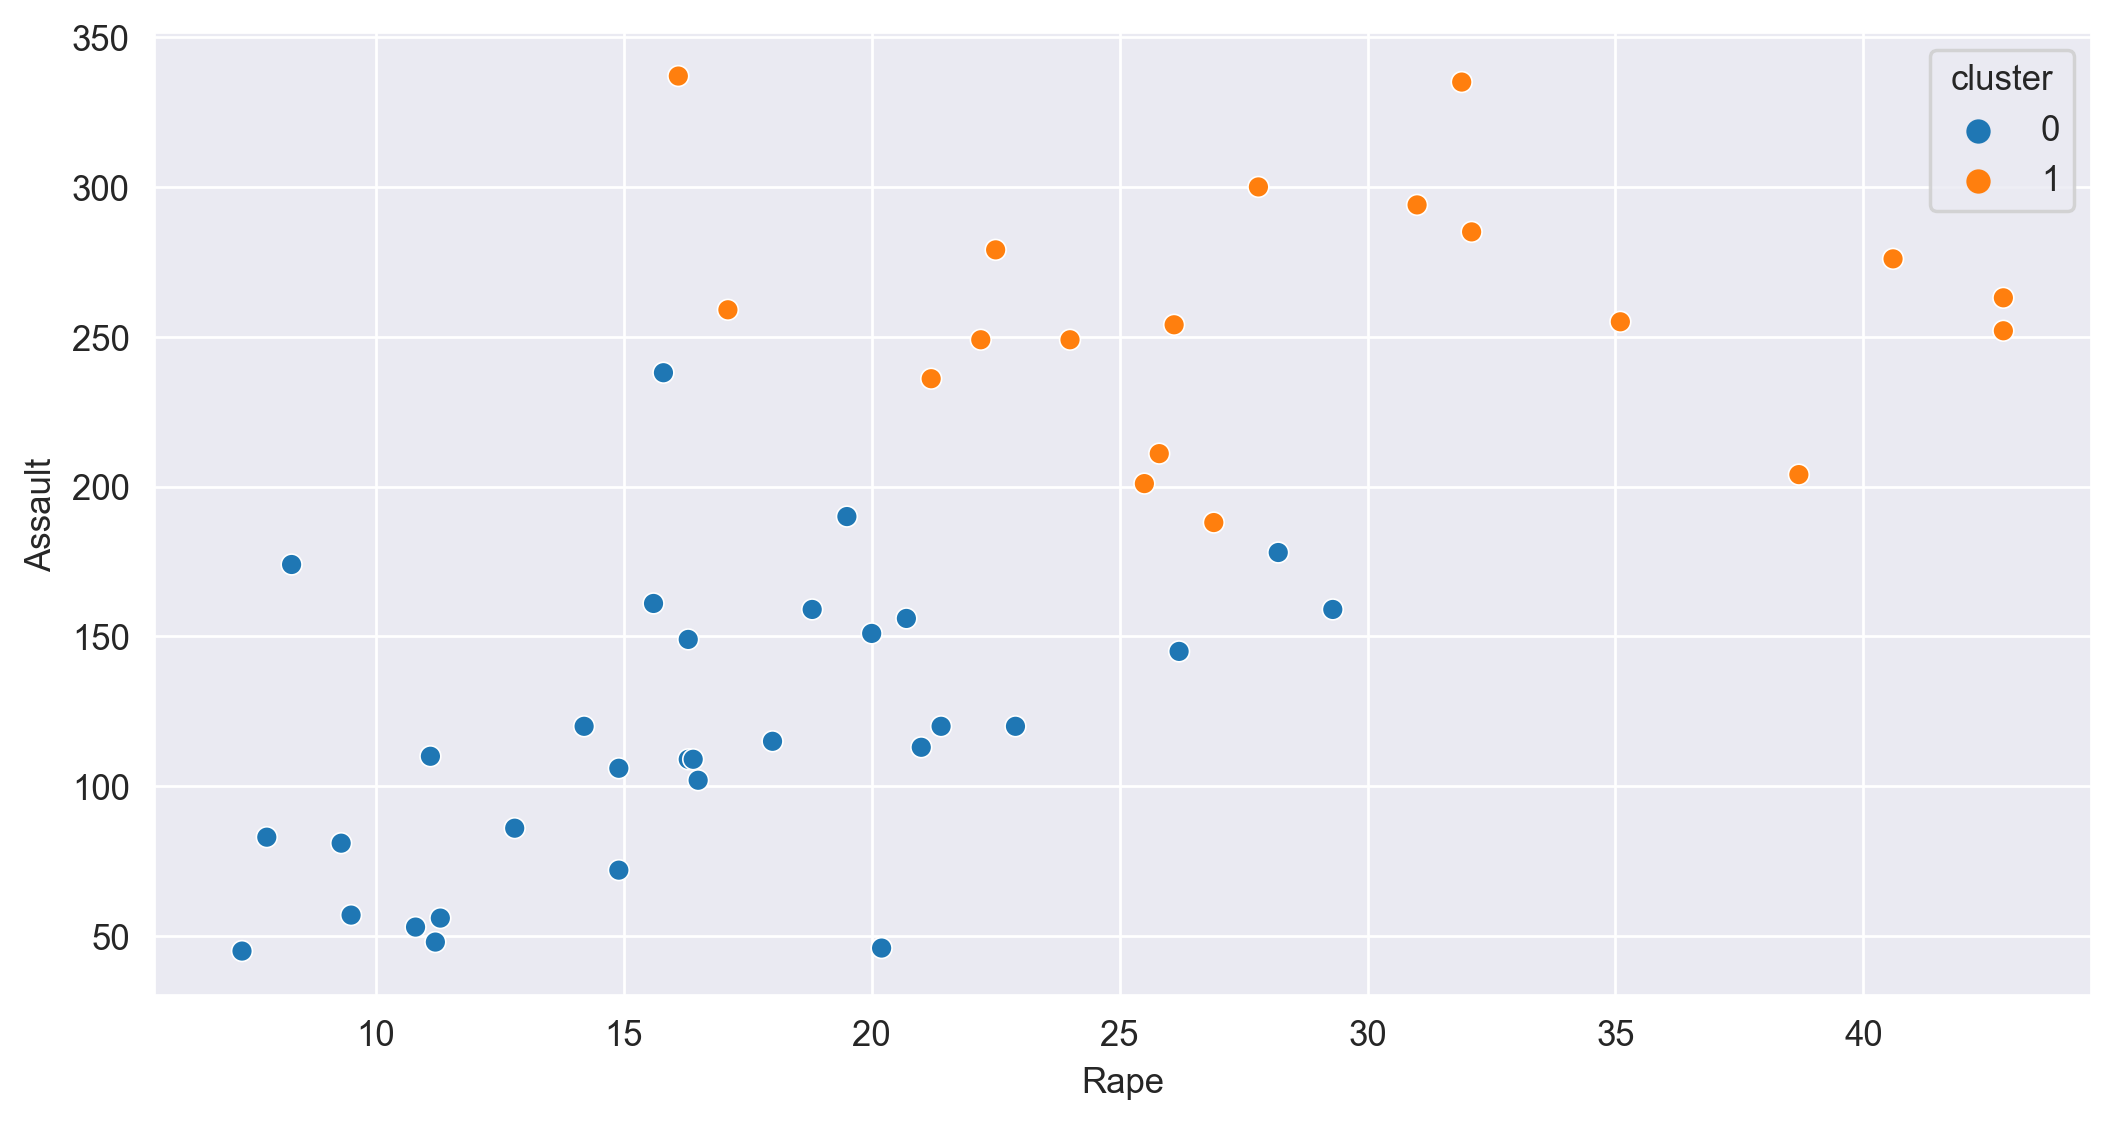

In [155]:
sns.scatterplot(df['Rape'], df['Assault'], hue=df['cluster'])

In [156]:
silhouette_score(x,y)

0.4051025513040865

In [157]:
#4 cluster

ag = AgglomerativeClustering(n_clusters=4)
y = ag.fit_predict(x)
y

array([3, 1, 1, 0, 1, 1, 0, 0, 1, 3, 0, 2, 1, 0, 2, 0, 0, 3, 2, 1, 0, 1,
       2, 3, 0, 2, 2, 1, 2, 0, 1, 1, 3, 2, 0, 0, 0, 0, 0, 3, 2, 3, 1, 0,
       2, 0, 0, 2, 2, 0], dtype=int64)

In [158]:
df['y'] = y
df

,Murder,Assault,UrbanPop,Rape,cluster,y
0,13.2,236,58,21.200,1,3
1,10.0,263,48,42.825,1,1
2,8.1,294,80,31.000,1,1
3,8.8,190,50,19.500,0,0
4,9.0,276,91,40.600,1,1
5,7.9,204,78,38.700,1,1
6,3.3,110,77,11.100,0,0
7,5.9,238,72,15.800,0,0
8,15.4,335,80,31.900,1,1
9,17.4,211,60,25.800,1,3


<AxesSubplot:xlabel='UrbanPop', ylabel='Murder'>

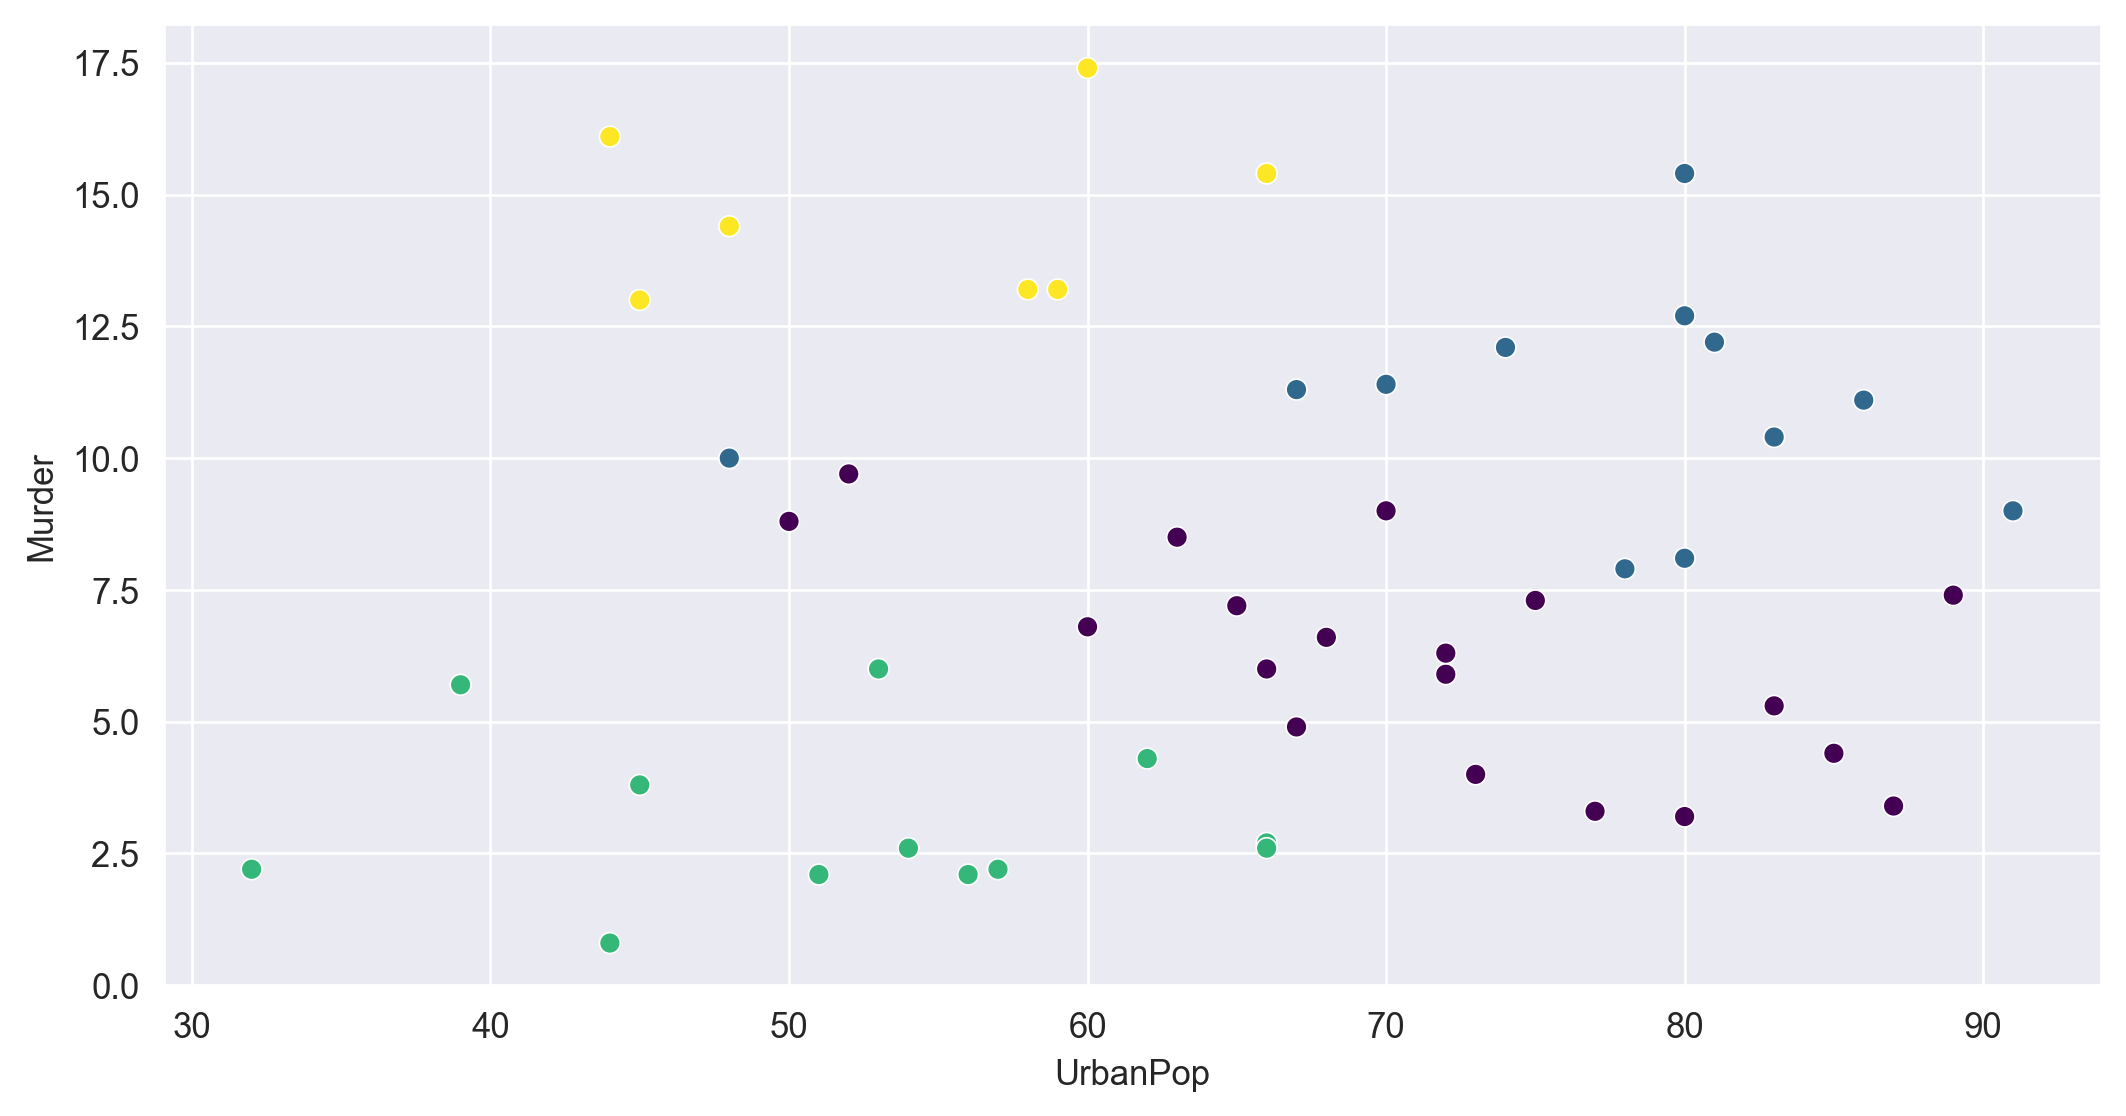

In [159]:
sns.scatterplot(df['UrbanPop'], df['Murder'], c=df['y'], cmap ='viridis')

In [160]:
silhouette_score(x,y)

0.33799212819290597

# K-Means

In [161]:
df = pd.read_csv('crime_data.csv')
df = df.drop(columns=df.iloc[:,:1])
df.head()

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [162]:
#Feature scaling

x = sc.fit_transform(df)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [163]:
#Plotting elbow graph to find out optimal number of cluster
from sklearn.cluster import KMeans

wcss = []

for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [164]:
wcss

[104.96163315756871,
 80.08569526137276,
 57.55425863091104,
 50.57105884207457,
 44.23594496399184,
 40.882368994020496,
 34.748080659723584,
 31.985197458679504]

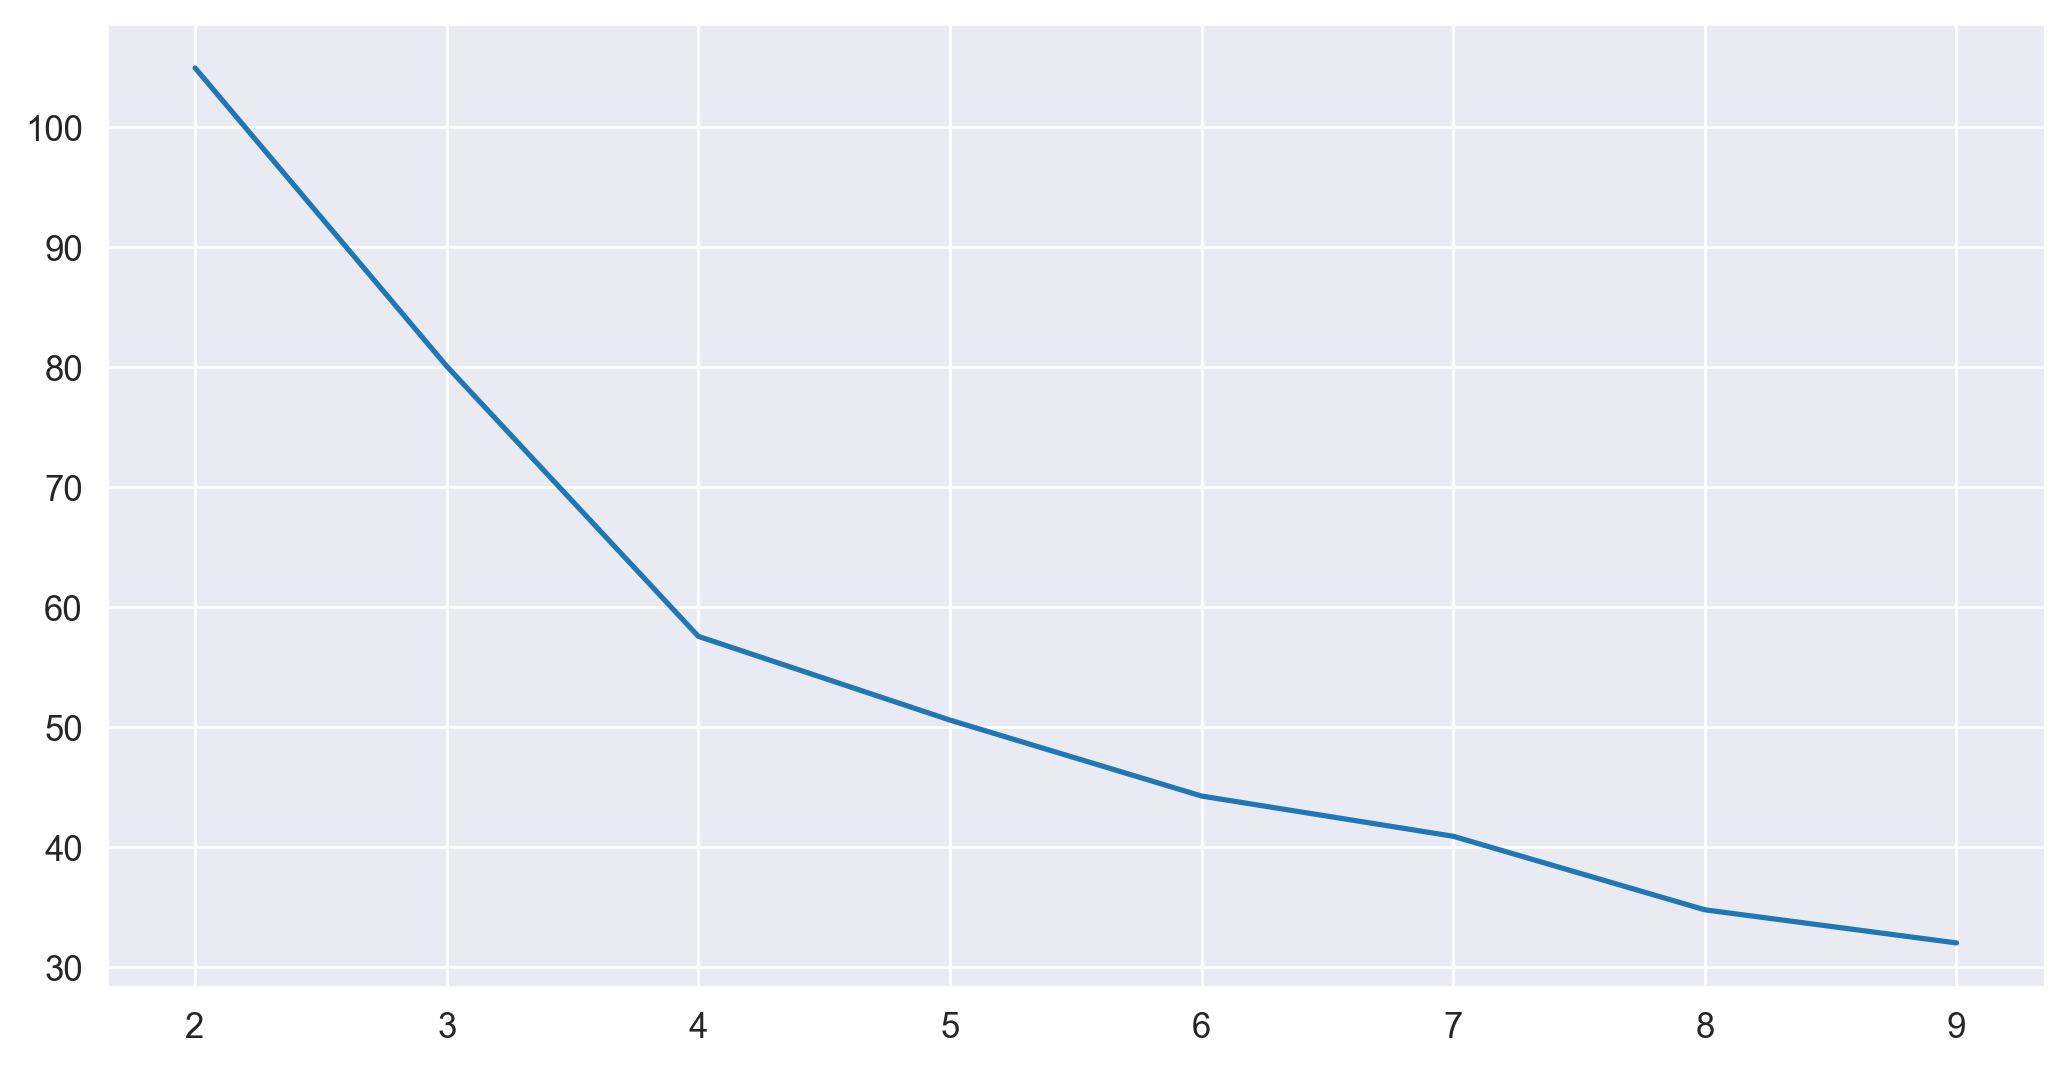

In [165]:
plt.plot(range(2,10), wcss)

From above elbow graph the number of cluster will be 4

In [166]:
#Model building

from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
y = km.fit_predict(x)
y

array([3, 1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 0, 1, 2, 0, 2, 0, 3, 0, 1, 2, 1,
       0, 3, 1, 0, 0, 1, 0, 2, 1, 1, 3, 0, 2, 2, 2, 2, 2, 3, 0, 3, 1, 2,
       0, 2, 2, 0, 0, 2])

In [167]:
df['cluster'] = y

<AxesSubplot:xlabel='Rape', ylabel='Assault'>

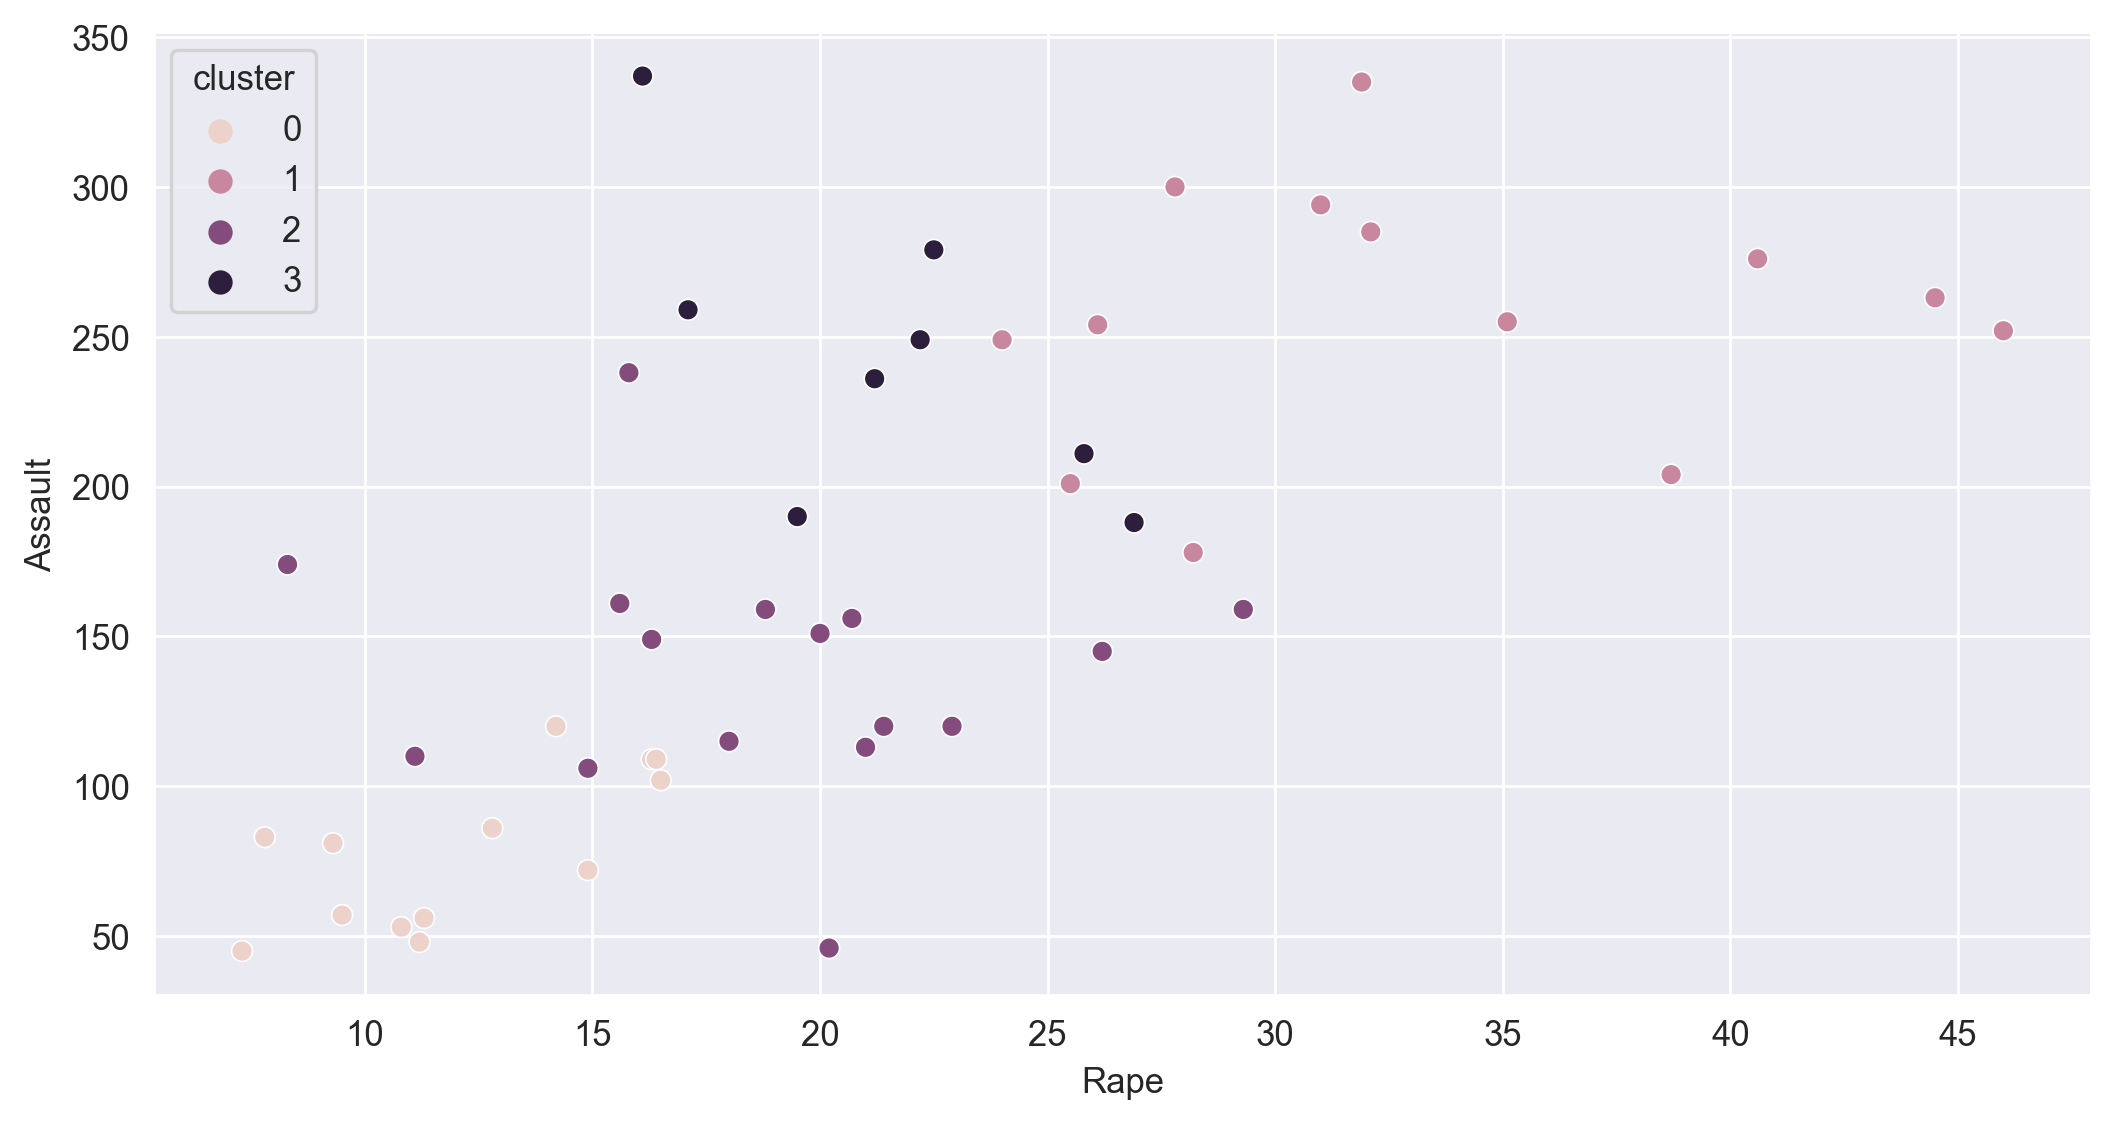

In [168]:
sns.scatterplot(df['Rape'], df['Assault'], hue=df['cluster'])

In [169]:
silhouette_score(x,y)

0.33968891433344395

# DBSCAN

# Hyperparameter tuning

# Selecting number of min_sample

1.Number of columns + 1


2.Number of column * 2

3.Number of Dimension + 1

4.Always keep min_sample at least 3

In [170]:
# Finding out eps value using K-Dist plot

from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [171]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.780062,0.849285
1,0.0,2.078984,2.136971
2,0.0,1.048220,1.083411
3,0.0,1.001328,1.007227
4,0.0,1.208977,1.300691
5,0.0,1.248863,1.300691
6,0.0,0.881004,0.956432
7,0.0,1.192276,1.271401
8,0.0,1.309743,1.349263
9,0.0,0.867978,1.022502


In [172]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilon value')

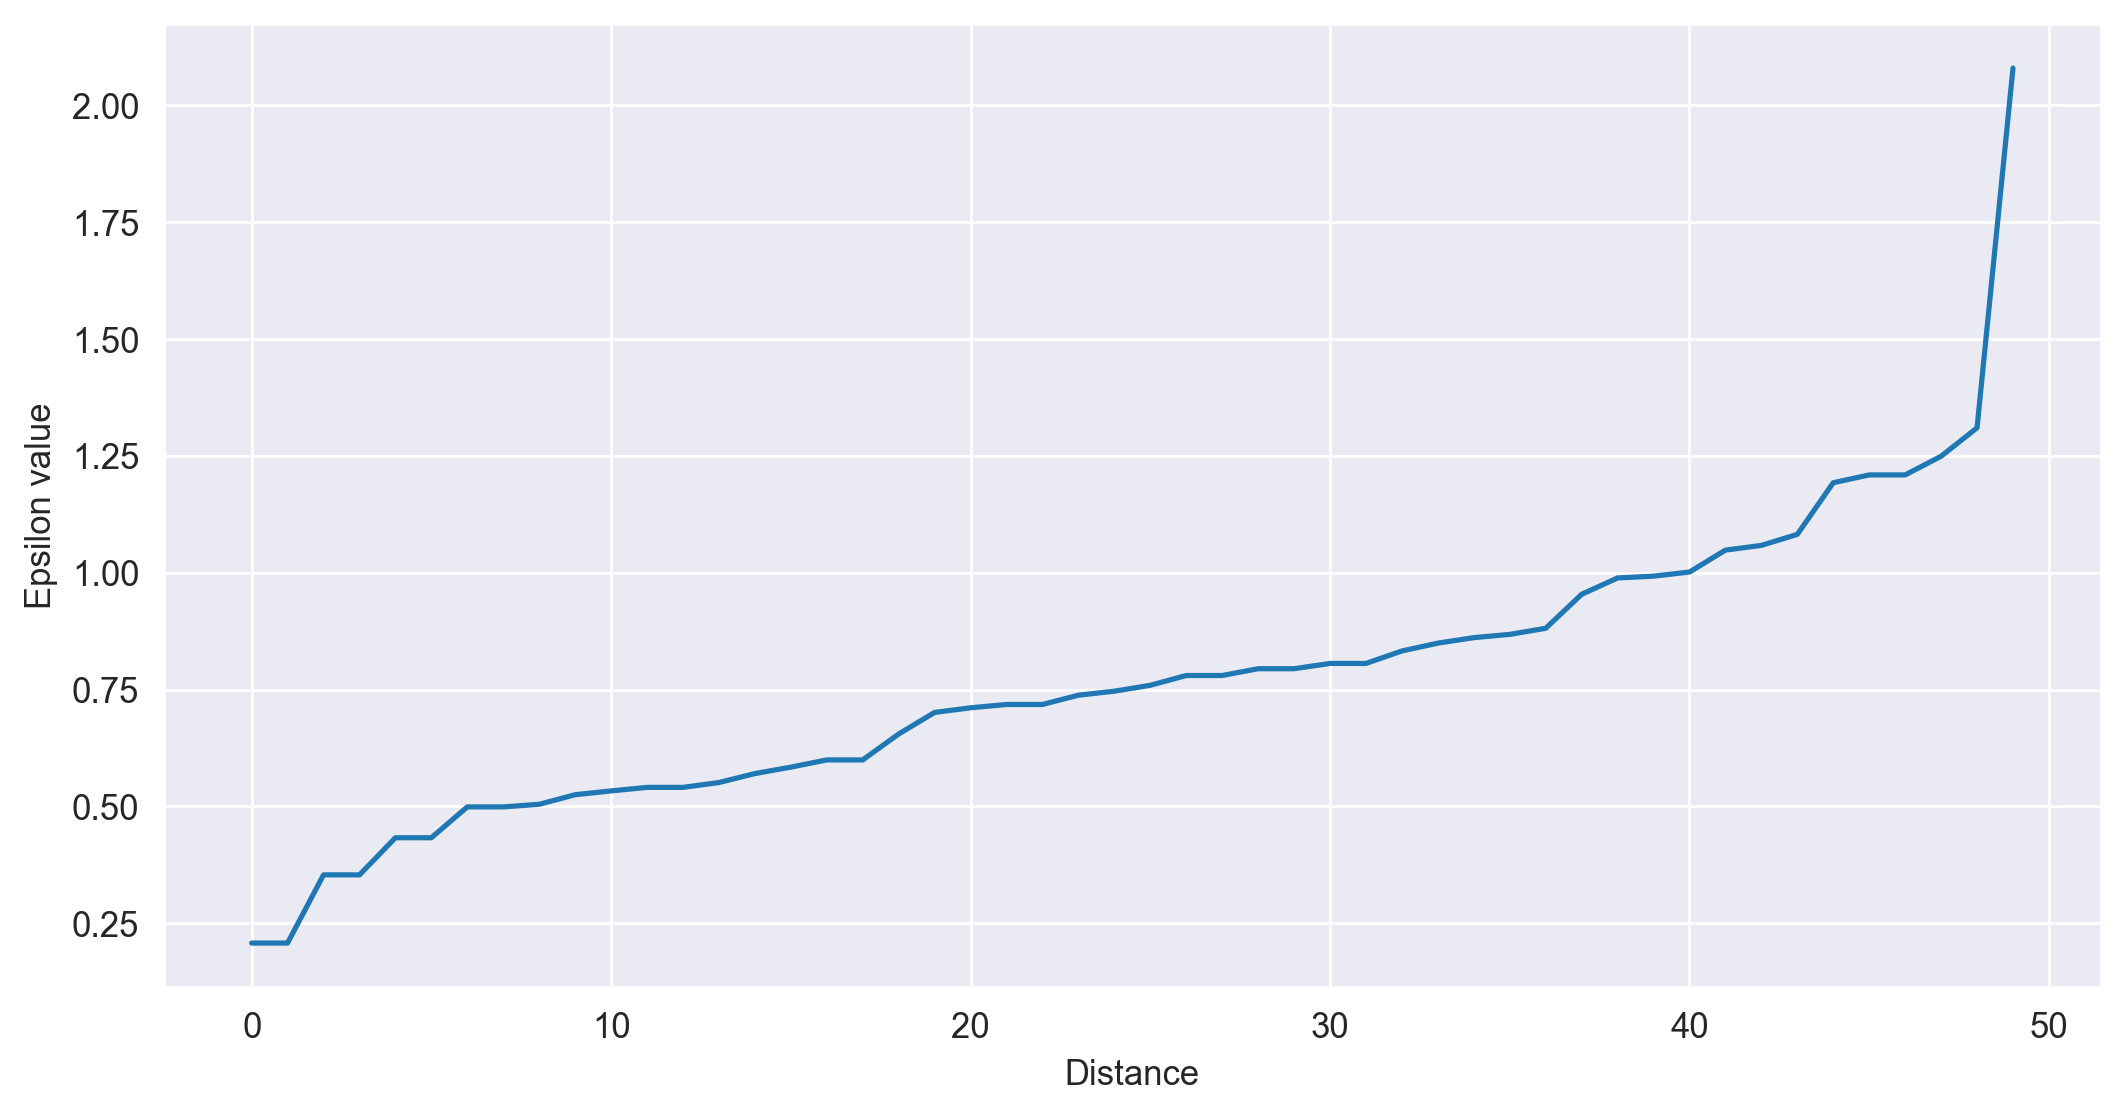

In [173]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilon value')

In [174]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=1.30, min_samples=5)
ypred = db.fit_predict(x)
ypred

array([ 0, -1,  0,  0, -1,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
      dtype=int64)

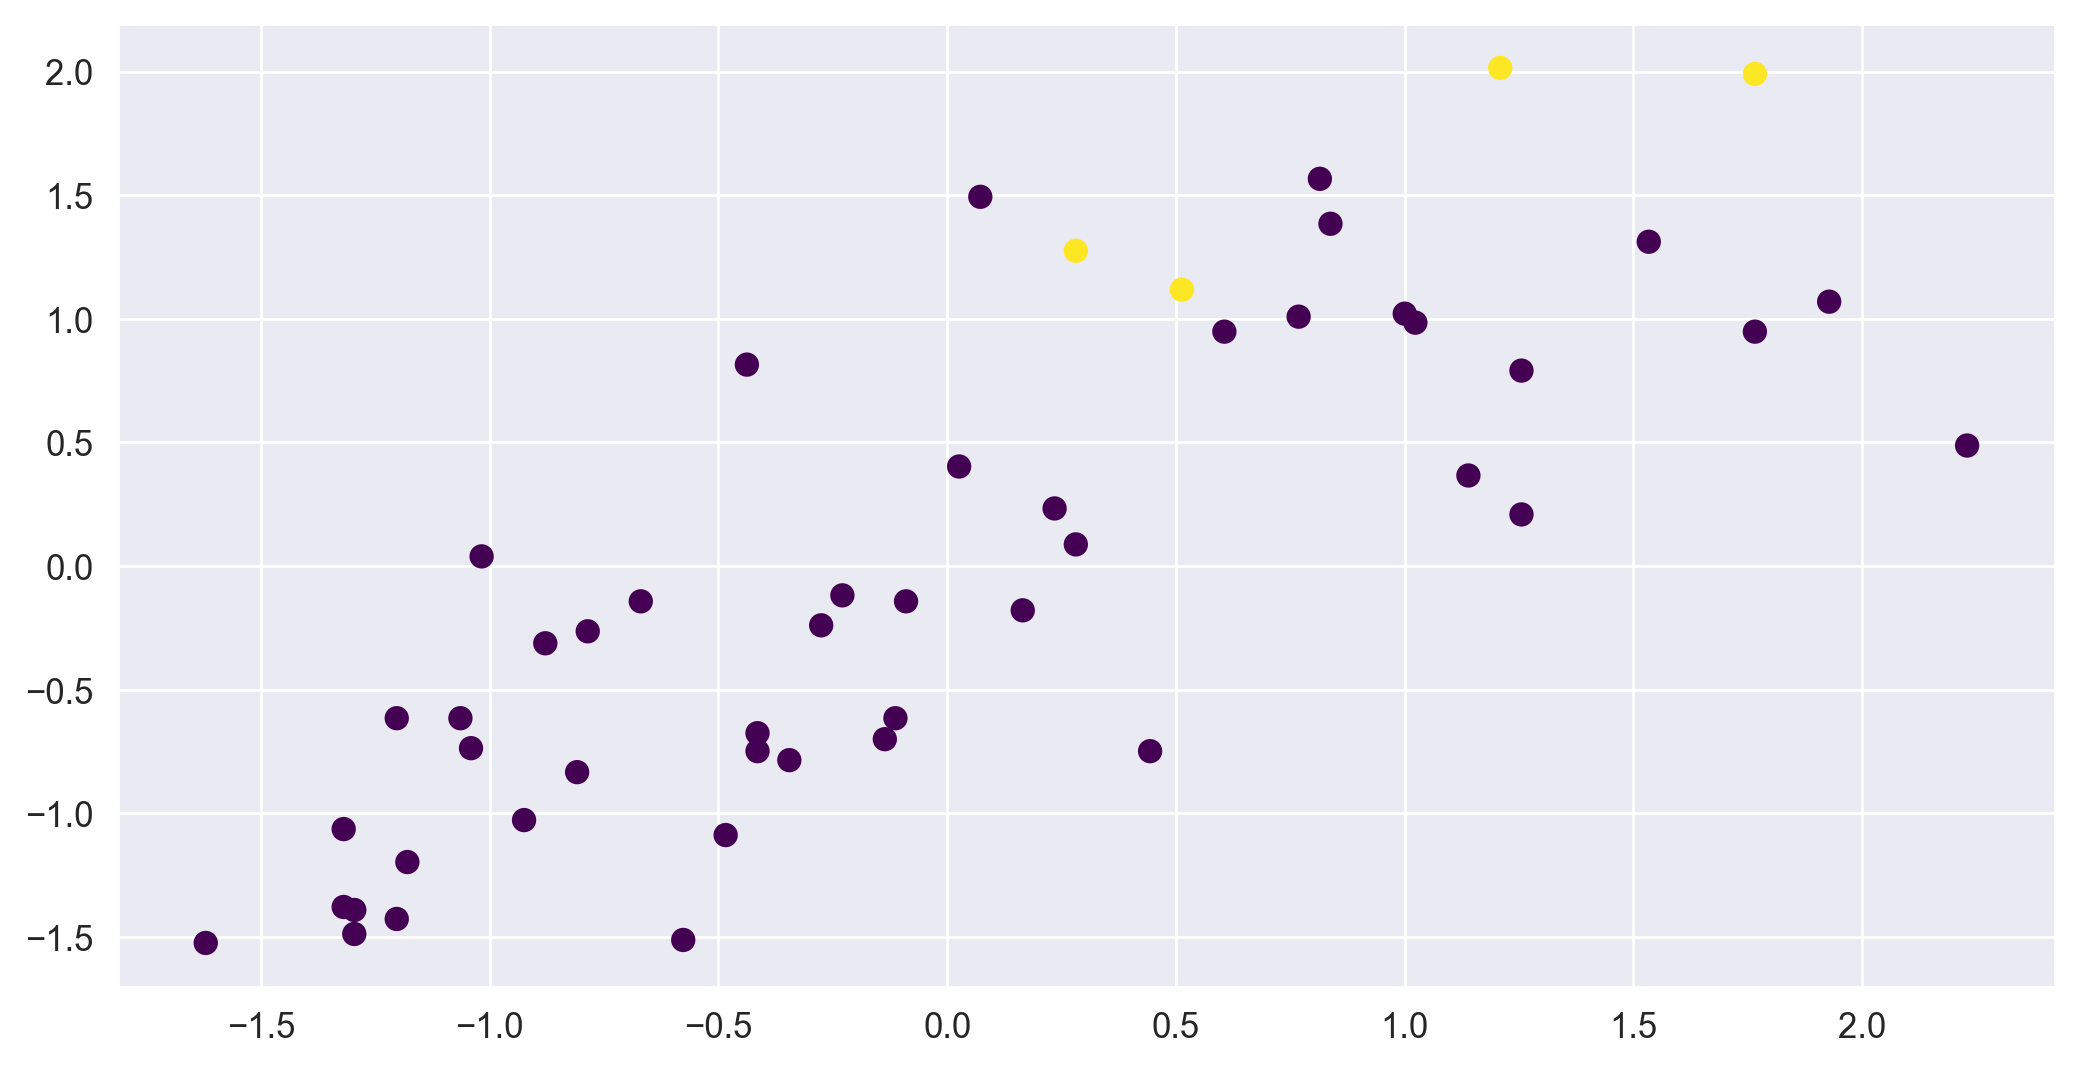

In [175]:
plt.scatter(x[:,0],x[:,1],c=ypred,cmap='viridis_r')

In [176]:
#Evaluate model

silhouette_score(x,ypred)

0.23290181596058246